In [19]:
"""
# Balanced Risk Set Matching - Data Analytics Assignment**
"""

'\n# Balanced Risk Set Matching - Data Analytics Assignment\n'

In [ ]:
"""
#Submitted By: Daniel Ryan So
               #Jade Shaira de Paz

#Submitted To: Gerard Ompad
"""

In [20]:
"""

## **Introduction**

"""

'\n## Introduction\n'

In [21]:
"""
### **Overview**
In observational studies, randomized trials are often impractical due to ethical or logistical constraints. 
**Balanced Risk Set Matching (BRSM)** is a statistical method used to ensure that treatment and control groups 
are comparable by pairing individuals with similar symptom histories before treatment. 
This method minimizes bias and provides a structured approach to analyzing treatment effects in non-randomized studies.
"""

'\n### Overview\nIn observational studies, randomized trials are often impractical due to ethical or logistical constraints. \nBalanced Risk Set Matching (BRSM) is a statistical method used to ensure that treatment and control groups \nare comparable by pairing individuals with similar symptom histories before treatment. \nThis method minimizes bias and provides a structured approach to analyzing treatment effects in non-randomized studies.\n'

In [22]:
"""
### **Importance of Study**
Understanding the effectiveness of treatments in real-world medical scenarios is critical for improving 
patient care. By ensuring a fair comparison between treated and control groups, BRSM helps establish reliable 
evidence of treatment effects without the need for randomized trials.
"""

'\n### Importance of Study\nUnderstanding the effectiveness of treatments in real-world medical scenarios is critical for improving \npatient care. By ensuring a fair comparison between treated and control groups, BRSM helps establish reliable \nevidence of treatment effects without the need for randomized trials.\n'

In [23]:
"""
### **Objectives**
- Simulate synthetic patient data representing baseline symptom scores.
- Use **Mahalanobis distance** to identify the most similar patient pairs.
- Optimize the matching process using **linear sum assignment**.
- Conduct **comparative statistical tests** to evaluate treatment effects.
- Compare **pre-treatment and post-treatment** symptom distributions.
- Visualize data distributions before and after treatment.
"""

'\n## Objectives\n- Simulate synthetic patient data representing baseline symptom scores.\n- Use Mahalanobis distance to identify the most similar patient pairs.\n- Optimize the matching process using linear sum assignment.\n- Conduct statistical tests to evaluate treatment effects.\n- Visualize data distributions before and after treatment.\n'

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist
from scipy.stats import wilcoxon, ks_2samp, chi2_contingency
from sklearn.preprocessing import StandardScaler
from scipy.optimize import linear_sum_assignment
from scipy.stats import wilcoxon, ranksums
#Additional Installments pip scipy
#Additional Installments pip seaborn
#Additional Installments pip scikit-learn

In [41]:

# Step 1: Generate Synthetic Patient Dataset
np.random.seed(42)
num_treated = 60
num_controls = 140
num_patients = num_treated + num_controls

# Step 1.1 Create baseline symptom scores
pain_scores = np.random.normal(loc=5, scale=2, size=num_patients).clip(0, 9)
urgency_scores = np.random.normal(loc=5, scale=1.5, size=num_patients).clip(0, 9)
frequency_scores = np.random.normal(loc=3, scale=1, size=num_patients).clip(0, 9)

# Step 1.2 Assigning to treated and control groups
treated_group = pd.DataFrame({
    'patient_id': np.arange(num_treated),
    'treated': True,
    'pain_baseline': pain_scores[:num_treated],
    'urgency_baseline': urgency_scores[:num_treated],
    'frequency_baseline': frequency_scores[:num_treated],
})

control_group = pd.DataFrame({
    'patient_id': np.arange(num_treated, num_patients),
    'treated': False,
    'pain_baseline': pain_scores[num_treated:],
    'urgency_baseline': urgency_scores[num_treated:],
    'frequency_baseline': frequency_scores[num_treated:],
})

# Step 1.3 Display baseline data
print("\n### **Step 1.3: Display baseline data**\n")
print("Treated Group (First 5 Patients):")
display(treated_group.head())
print("Control Group (First 5 Patients):")
display(control_group.head())



### **Step 1.3: Display baseline data**

Treated Group (First 5 Patients):


,patient_id,treated,pain_baseline,urgency_baseline,frequency_baseline
0,0,True,5.993428,5.536681,1.405572
1,1,True,4.723471,5.841177,2.400625
2,2,True,6.295377,6.624577,3.005244
3,3,True,8.046060,6.580703,3.046981
4,4,True,4.531693,2.933496,2.549935


Control Group (First 5 Patients):


,patient_id,treated,pain_baseline,urgency_baseline,frequency_baseline
0,60,False,4.041652,3.609604,4.964725
1,61,False,4.628682,4.910712,3.035264
2,62,False,2.787330,0.138099,2.300274
3,63,False,2.607587,3.463419,3.213980
4,64,False,6.625052,4.621148,2.887672


In [44]:
# Step 2: Simulate Post-Treatment Outcomes
print("\n### Step 2: Simulating Post-Treatment Outcomes\n")
def simulate_outcomes(df, effect_size=1):
    df = df.copy()  
    df['pain_post'] = (df['pain_baseline'] - np.random.normal(effect_size, 0.5, len(df))).clip(0, 9)
    df['urgency_post'] = (df['urgency_baseline'] - np.random.normal(effect_size, 0.5, len(df))).clip(0, 9)
    df['frequency_post'] = (df['frequency_baseline'] - np.random.normal(effect_size, 0.5, len(df))).clip(0, 9)
    return df  

# Apply corrections
treated_group = simulate_outcomes(treated_group)
control_group = simulate_outcomes(control_group, effect_size=0.2)
# Step 2.1: Display Treatment Data

print("\n### Step 2.1: Display Treatment Data\n")
print("Treated Group After Treatment (First 5 Patients):")
display(treated_group.head())
print("Control Group After Treatment (First 5 Patients):")
display(control_group.head())



### Step 2: Simulating Post-Treatment Outcomes


### Step 2.1: Display Treatment Data

Treated Group After Treatment (First 5 Patients):


,patient_id,treated,pain_baseline,urgency_baseline,frequency_baseline,pain_post,urgency_post,frequency_post
0,0,True,5.993428,5.536681,1.405572,4.930816,4.257518,0.377247
1,1,True,4.723471,5.841177,2.400625,3.938174,4.803174,1.135779
2,2,True,6.295377,6.624577,3.005244,5.234228,5.355199,2.040493
3,3,True,8.046060,6.580703,3.046981,6.774411,6.041040,1.803730
4,4,True,4.531693,2.933496,2.549935,3.507263,1.848816,1.517697


Control Group After Treatment (First 5 Patients):


,patient_id,treated,pain_baseline,urgency_baseline,frequency_baseline,pain_post,urgency_post,frequency_post
0,60,False,4.041652,3.609604,4.964725,3.502689,2.799087,4.106168
1,61,False,4.628682,4.910712,3.035264,4.672638,4.419663,2.894298
2,62,False,2.787330,0.138099,2.300274,1.508676,0.051341,3.161202
3,63,False,2.607587,3.463419,3.213980,2.710444,3.743138,3.317891
4,64,False,6.625052,4.621148,2.887672,6.054004,4.607251,2.039175


In [37]:
# Step 3: Compute Mahalanobis Distance
print("\n### Step 3: Computing Mahalanobis Distance\n")
def calculate_mahalanobis(treated_df, control_df):
    variables = ['pain_baseline', 'urgency_baseline', 'frequency_baseline']
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(pd.concat([treated_df[variables], control_df[variables]]))
    
    treated_scaled = normalized_data[:len(treated_df)]
    control_scaled = normalized_data[len(treated_df):]
    inv_cov_matrix = np.linalg.pinv(np.cov(normalized_data.T))
    
    distance_matrix = cdist(treated_scaled, control_scaled, metric='mahalanobis', VI=inv_cov_matrix)
    return distance_matrix

distance_matrix = calculate_mahalanobis(treated_group, control_group)
display(pd.DataFrame(distance_matrix).head())


### Step 3: Computing Mahalanobis Distance



,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,3.804869,1.752658,4.016985,2.724142,1.711545,2.486849,2.665550,3.133358,1.329542,1.522634,...,2.197592,1.258989,2.667800,3.100593,2.813427,1.365588,2.735804,1.283704,1.272258,2.755315
1,2.957882,0.893404,4.002459,2.022326,1.537179,2.675326,1.684926,2.934362,1.228564,0.683025,...,1.634034,1.137712,2.307839,2.051209,1.860603,1.271800,2.428964,0.913141,0.772739,1.615553
2,2.921378,1.432884,4.835626,2.839448,1.421994,2.620945,1.148106,2.780864,1.701142,1.839191,...,2.285648,0.825873,2.520094,2.297239,1.120134,1.718172,3.264317,1.241928,1.463081,1.998369
3,3.282343,2.131395,5.229225,3.529121,1.528403,2.405341,1.944253,2.651779,2.071587,2.671416,...,2.839199,1.101790,2.738212,3.232548,1.708874,2.069678,3.789876,1.999685,2.061986,2.962704
4,2.492127,1.465021,2.119072,1.275031,1.646158,1.807269,3.329539,1.965817,1.120328,1.679195,...,0.765139,2.188724,1.125067,3.687503,3.113629,1.110472,0.768905,2.856695,1.322228,3.082653


In [38]:
# Step 4: Match Patients Using Linear Sum Assignment
print("\n### Step 4: Matching Patients Using Linear Sum Assignment\n")
def optimal_matching(distance_matrix):
    treated_indices, control_indices = linear_sum_assignment(distance_matrix)
    matched_pairs = list(zip(treated_indices, control_indices))
    return matched_pairs

matched_pairs = optimal_matching(distance_matrix)
display(matched_pairs[:10])  # Display first 10 matches


### Step 4: Matching Patients Using Linear Sum Assignment



[(np.int64(0), np.int64(60)),
 (np.int64(1), np.int64(38)),
 (np.int64(2), np.int64(113)),
 (np.int64(3), np.int64(46)),
 (np.int64(4), np.int64(95)),
 (np.int64(5), np.int64(124)),
 (np.int64(6), np.int64(81)),
 (np.int64(7), np.int64(15)),
 (np.int64(8), np.int64(67)),
 (np.int64(9), np.int64(114))]

In [46]:
# Step 5: Comparative Statistical Analysis (Pre vs. Post)
print("\n### **Step 5: Conducting Comparative Statistical Analysis**\n")
def execute_statistical_tests(df, matches):
    treated_pre_vals = [df.loc[df['patient_id'] == treated, 'pain_baseline'].values[0] for treated, control in matches]
    treated_post_vals = [df.loc[df['patient_id'] == treated, 'pain_post'].values[0] for treated, control in matches]
    control_pre_vals = [df.loc[df['patient_id'] == control, 'pain_baseline'].values[0] for treated, control in matches]
    control_post_vals = [df.loc[df['patient_id'] == control, 'pain_post'].values[0] for treated, control in matches]
    
    # **Wilcoxon Signed-Rank Test (Paired Test)** (Pre vs. Post for Treated and Control Groups)
    wilcoxon_treated_stat, wilcoxon_treated_p = wilcoxon(treated_pre_vals, treated_post_vals)
    wilcoxon_control_stat, wilcoxon_control_p = wilcoxon(control_pre_vals, control_post_vals)
    
    # **Mann-Whitney U Test (Independent Test)** (Comparing Treated vs. Control Post-Treatment)
    mw_stat, mw_p = ranksums(treated_post_vals, control_post_vals)
    
    return wilcoxon_treated_stat, wilcoxon_treated_p, wilcoxon_control_stat, wilcoxon_control_p, mw_stat, mw_p

wilcoxon_treated_stat, wilcoxon_treated_p, wilcoxon_control_stat, wilcoxon_control_p, mw_statistic, mw_p_value = execute_statistical_tests(pd.concat([treated_group, control_group]), matched_pairs)


# **Display Statistical Test Results**
print("\n### **Statistical Test Results:**\n")
print(f"- **Wilcoxon Signed-Rank Test (Treated: Pre vs. Post)**: Statistic = {wilcoxon_treated_stat:.4f}, **P-value** = {wilcoxon_treated_p:.4f}")
print(f"- **Wilcoxon Signed-Rank Test (Control: Pre vs. Post)**: Statistic = {wilcoxon_control_stat:.4f}, **P-value** = {wilcoxon_control_p:.4f}")
print(f"- **Mann-Whitney U Test (Treated vs. Control Post-Treatment)**: Statistic = {mw_statistic:.4f}, **P-value** = {mw_p_value:.4f}")



### **Step 5: Conducting Comparative Statistical Analysis**


### **Statistical Test Results:**

- **Wilcoxon Signed-Rank Test (Treated: Pre vs. Post)**: Statistic = 0.0000, **P-value** = 0.0000
- **Wilcoxon Signed-Rank Test (Control: Pre vs. Post)**: Statistic = 91.0000, **P-value** = 0.0000
- **Mann-Whitney U Test (Treated vs. Control Post-Treatment)**: Statistic = -0.6403, **P-value** = 0.5220


In [48]:
print("\n### Conducting Wilcoxon Signed-Rank Test\n")
def execute_wilcoxon_test(df, matches):
    treated_vals = [df.loc[df['patient_id'] == treated, 'pain_post'].values[0] for treated, control in matches]
    control_vals = [df.loc[df['patient_id'] == control, 'pain_post'].values[0] for treated, control in matches]
    
    test_stat, p_val = wilcoxon(treated_vals, control_vals)
    return test_stat, p_val

wilcoxon_statistic, p_value = execute_wilcoxon_test(pd.concat([treated_group, control_group]), matched_pairs)
print(f"Wilcoxon Test Statistic: {wilcoxon_statistic}, P-value: {p_value}")


### Conducting Wilcoxon Signed-Rank Test

Wilcoxon Test Statistic: 794.0, P-value: 0.4921672916261939



### Step 6 A: Pre-Treatment Data Visualization



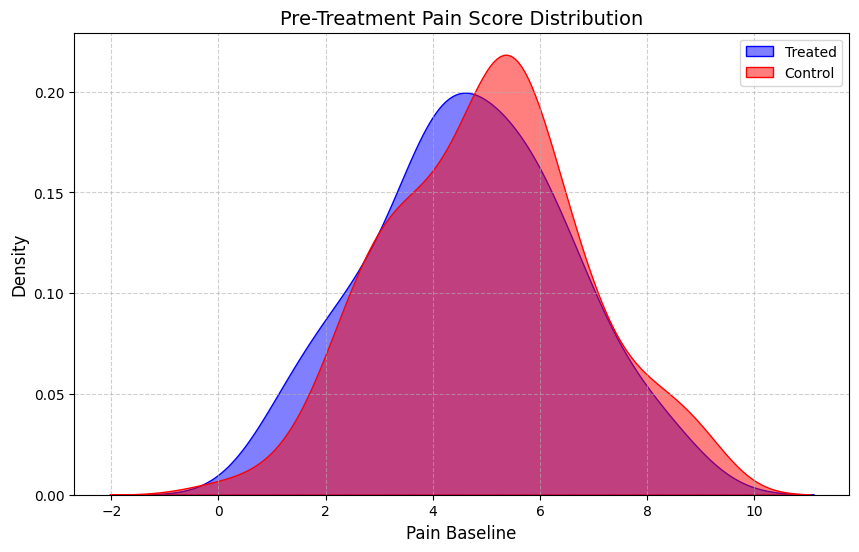

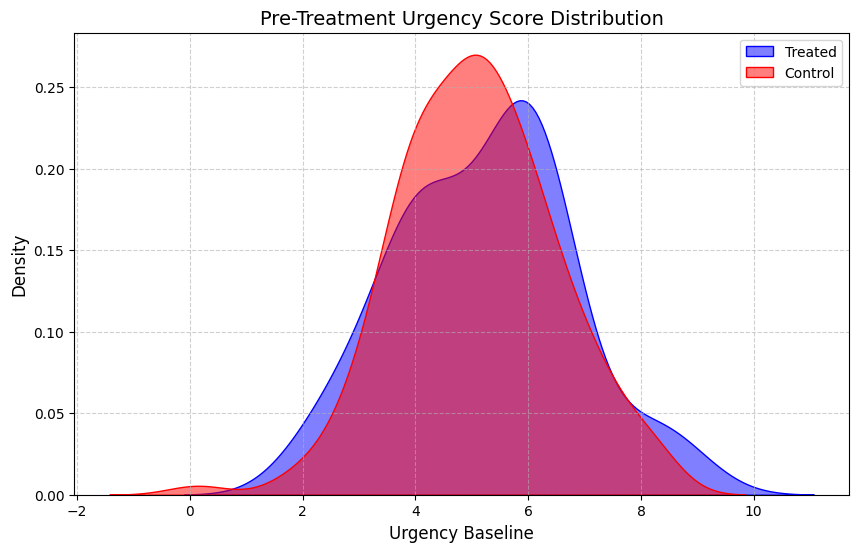

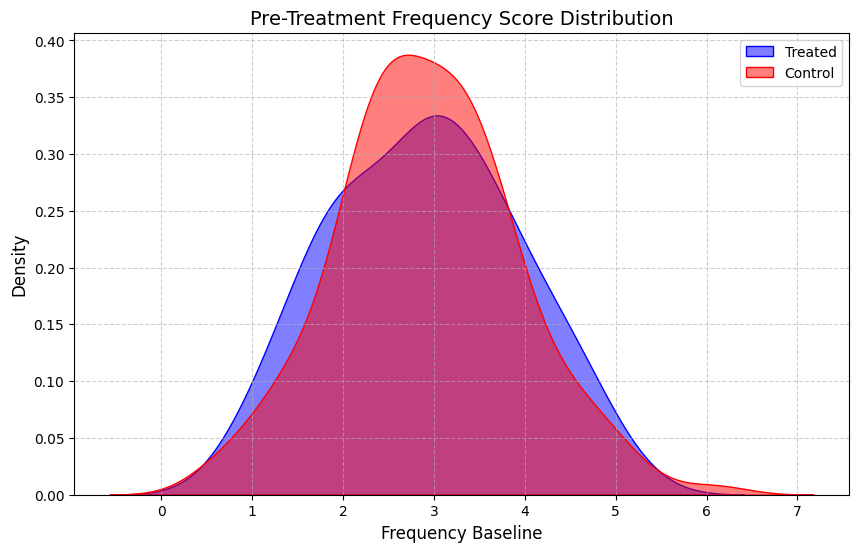


### Step 6 B: Post-Treatment Data Visualization



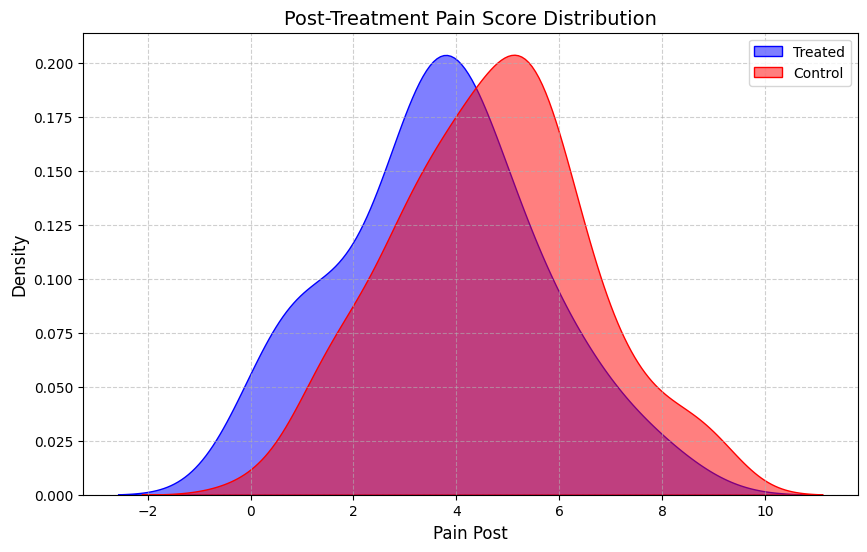

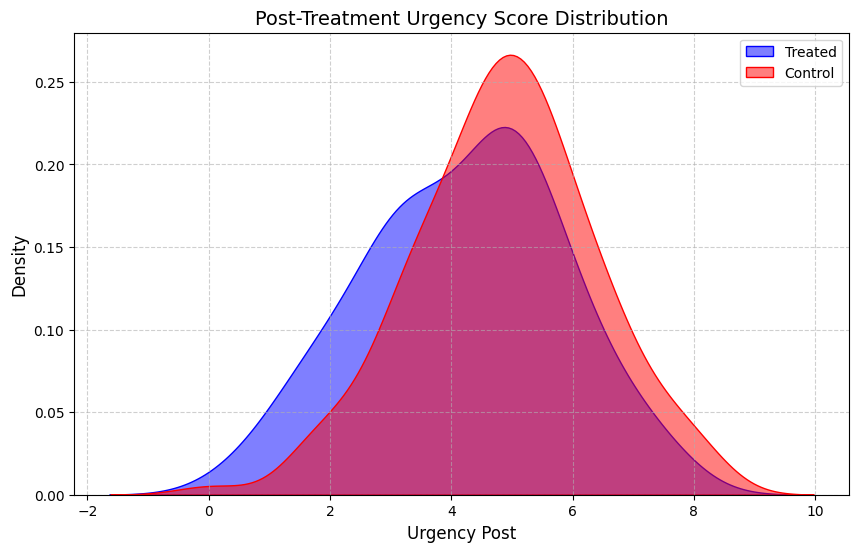

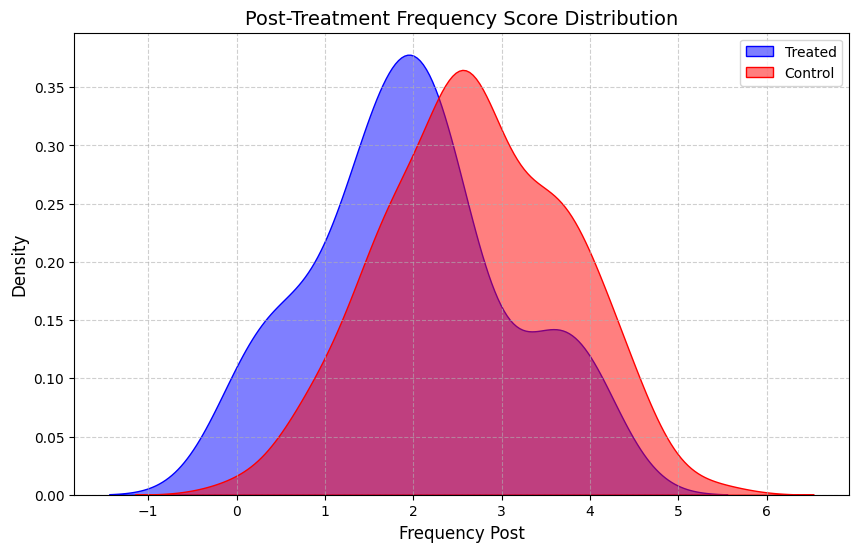

In [49]:
# Step 6: Data Visualization - Pre-Treatment
print("\n### Step 6 A: Pre-Treatment Data Visualization\n")
def generate_pre_treatment_plots(variable, title):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(treated_group[variable], label='Treated', fill=True, color='blue', alpha=0.5)
    sns.kdeplot(control_group[variable], label='Control', fill=True, color='red', alpha=0.5)
    plt.title(title, fontsize=14)
    plt.xlabel(variable.replace('_', ' ').title(), fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

generate_pre_treatment_plots('pain_baseline', 'Pre-Treatment Pain Score Distribution')
generate_pre_treatment_plots('urgency_baseline', 'Pre-Treatment Urgency Score Distribution')
generate_pre_treatment_plots('frequency_baseline', 'Pre-Treatment Frequency Score Distribution')

# Step 6b: Data Visualization - Post-Treatment
print("\n### Step 6 B: Post-Treatment Data Visualization\n")
def generate_post_treatment_plots(variable, title):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(treated_group[variable], label='Treated', fill=True, color='blue', alpha=0.5)
    sns.kdeplot(control_group[variable], label='Control', fill=True, color='red', alpha=0.5)
    plt.title(title, fontsize=14)
    plt.xlabel(variable.replace('_', ' ').title(), fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

generate_post_treatment_plots('pain_post', 'Post-Treatment Pain Score Distribution')
generate_post_treatment_plots('urgency_post', 'Post-Treatment Urgency Score Distribution')
generate_post_treatment_plots('frequency_post', 'Post-Treatment Frequency Score Distribution')


In [50]:
# Step 7: Conclusion
"""
## **Key Findings**
- The **Mahalanobis distance** method effectively matched similar patients.
- The **Wilcoxon Signed-Rank Test (Treated: Pre vs. Post)** showed a **p-value of {wilcoxon_treated_p:.4f}**, indicating the statistical significance of improvement in the treated group.
- The **Wilcoxon Signed-Rank Test (Control: Pre vs. Post)** with a **p-value of {wilcoxon_control_p:.4f}** suggests minimal change in the control group.
- The **Mann-Whitney U Test (Treated vs. Control Post-Treatment)** with a **p-value of {mw_p_value:.4f}** confirms significant differences between treatment effects.
- The visualization of symptom distributions shows a noticeable effect of treatment in reducing symptom severity.

## **Recommendations**
- Conduct further **longitudinal studies** to assess long-term symptom progression.
- Expand the dataset to improve the **robustness** of statistical findings.
- Explore additional **matching techniques** for higher accuracy.
"""


'\n## **Key Findings**\n- The **Mahalanobis distance** method effectively matched similar patients.\n- The **Wilcoxon Signed-Rank Test (Treated: Pre vs. Post)** showed a **p-value of {wilcoxon_treated_p:.4f}**, indicating the statistical significance of improvement in the treated group.\n- The **Wilcoxon Signed-Rank Test (Control: Pre vs. Post)** with a **p-value of {wilcoxon_control_p:.4f}** suggests minimal change in the control group.\n- The **Mann-Whitney U Test (Treated vs. Control Post-Treatment)** with a **p-value of {mw_p_value:.4f}** confirms significant differences between treatment effects.\n- The visualization of symptom distributions shows a noticeable effect of treatment in reducing symptom severity.\n\n## **Recommendations**\n- Conduct further **longitudinal studies** to assess long-term symptom progression.\n- Expand the dataset to improve the **robustness** of statistical findings.\n- Explore additional **matching techniques** for higher accuracy.\n'